In [2406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib_inline
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.naive_bayes import MultinomialNB

In [2407]:
df=pd.read_csv('salary.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [2408]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [2409]:
df.shape

(397, 6)

In [2410]:
df.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
196,AsstProf,B,4,4,Male,92700
212,Prof,B,15,7,Male,128400
21,Prof,A,36,31,Male,102580
292,Prof,A,39,9,Male,183800
35,AsstProf,B,5,0,Female,77000


In [2411]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [2412]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [2413]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [2414]:
#cleaning the data

In [2415]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [2416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [2417]:
le=LabelEncoder()
list1=['discipline','rank','sex']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [2418]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [2419]:
df.nunique()

rank               3
discipline         2
yrs.since.phd     53
yrs.service       52
sex                2
salary           371
dtype: int64

In [2420]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [2421]:
df['sex'].value_counts()

1    358
0     39
Name: sex, dtype: int64

In [2422]:
df['discipline'].value_counts()

1    216
0    181
Name: discipline, dtype: int64

In [2423]:
df['rank'].value_counts()

2    266
1     67
0     64
Name: rank, dtype: int64

In [2461]:
df.drop('sex',axis=1,inplace=True)


In [2425]:
#df.drop('rank',axis=1,inplace=True)

In [2462]:
df.sample(6)

,rank,discipline,yrs.since.phd,yrs.service,salary
141,0,0,15,10,81500
144,2,1,27,27,112696
117,2,0,39,36,117515
326,2,1,23,15,124714
94,2,1,21,20,123683
371,2,0,23,20,110515


<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

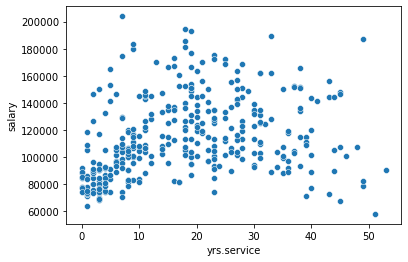

In [2463]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

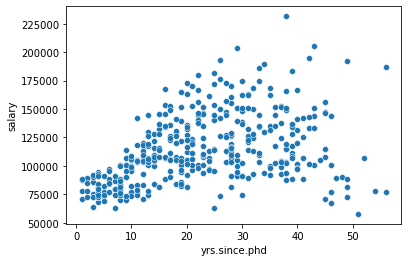

In [2428]:
sns.scatterplot()
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

In [2429]:
#identify outliers

<AxesSubplot:ylabel='salary'>

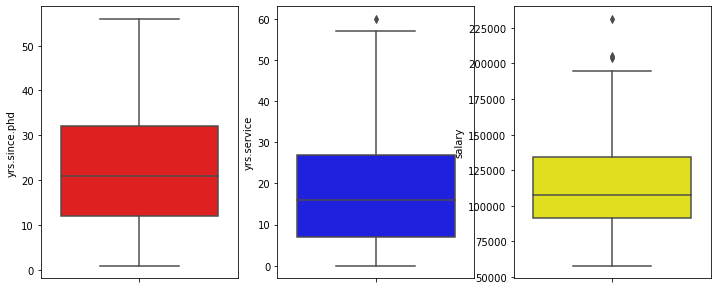

In [2430]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(12,5))
sns.boxplot(ax=ax1,y=df['yrs.since.phd'],color='red')
sns.boxplot(ax=ax2,y=df['yrs.service'],color='blue')
sns.boxplot(ax=ax3,y=df['salary'],color='yellow')



In [2431]:
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [2464]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (354, 5)


In [2386]:
#relationship analysis

In [2465]:
df1=df.corr()
df1

,rank,discipline,yrs.since.phd,yrs.service,salary
rank,1.000000,-0.095962,0.524310,0.446604,0.515398
discipline,-0.095962,1.000000,-0.233685,-0.185759,0.127542
yrs.since.phd,0.524310,-0.233685,1.000000,0.908046,0.386818
yrs.service,0.446604,-0.185759,0.908046,1.000000,0.284771
salary,0.515398,0.127542,0.386818,0.284771,1.000000


<AxesSubplot:>

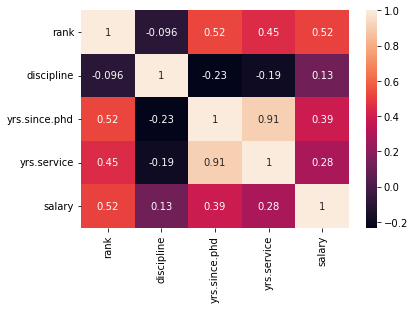

In [2466]:
sns.heatmap(data=df1,annot=True)

In [2467]:
df.nunique()

rank               3
discipline         2
yrs.since.phd     53
yrs.service       50
salary           336
dtype: int64

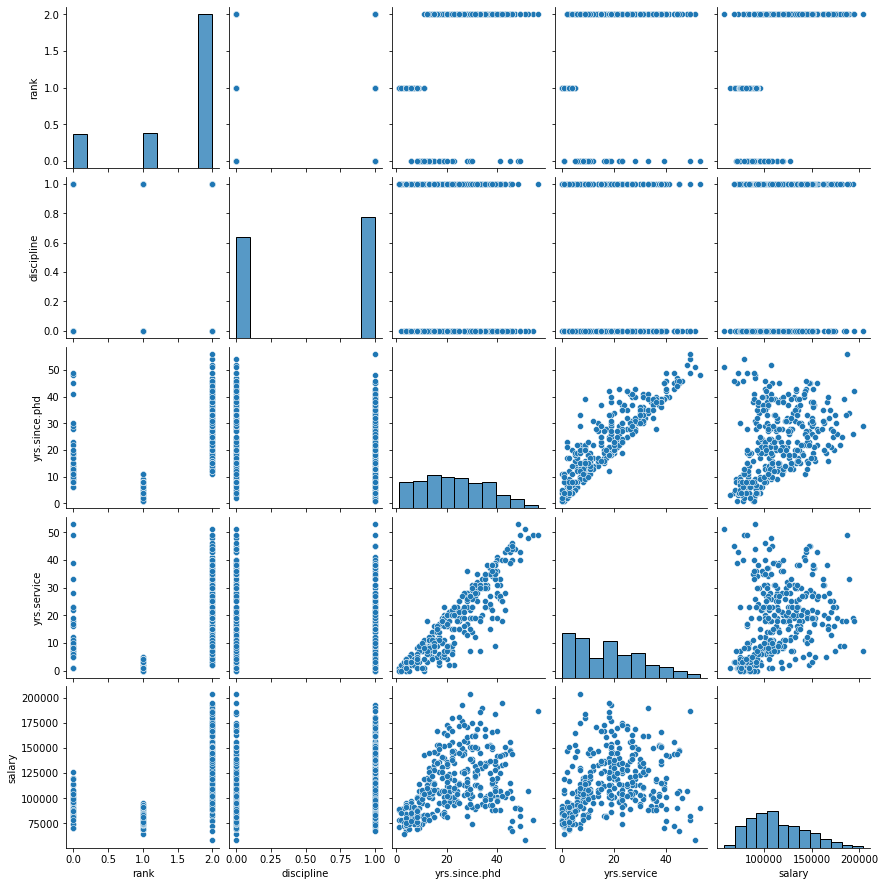

In [2468]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='salary', ylabel='Density'>

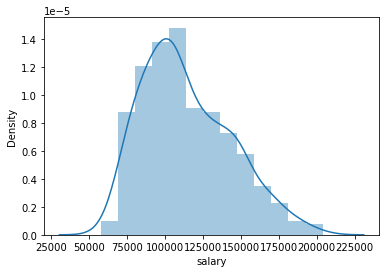

In [2391]:
sns.distplot(df['salary'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

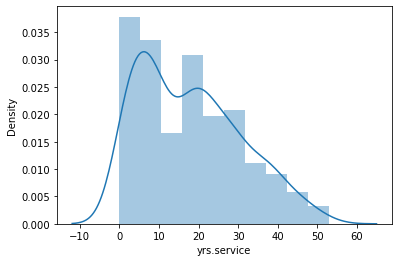

In [2436]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

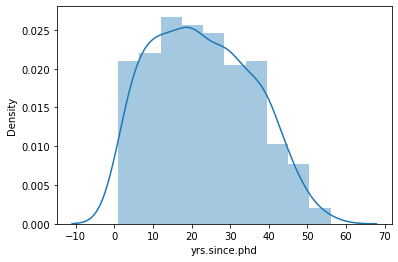

In [2393]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

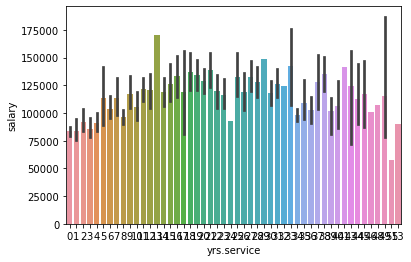

In [2437]:

sns.barplot(x='yrs.service', y='salary', data=df)

In [2395]:
# splitting the data

In [2469]:
x=df.iloc[:,:-1]
x

,rank,discipline,yrs.since.phd,yrs.service
0,2,1,19,18
1,2,1,20,16
2,1,1,4,3
3,2,1,45,39
4,2,1,40,41
...,...,...,...,...
392,2,0,33,30
393,2,0,31,19
394,2,0,42,25
395,2,0,25,15


In [2470]:
y=df.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

In [2499]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)


In [2500]:
y_train.value_counts()

74000     4
92000     3
111350    2
73000     2
92700     2
         ..
81500     1
142500    1
88175     1
88709     1
117515    1
Name: salary, Length: 235, dtype: int64

In [2491]:
lm=LinearRegression()
lm.fit(x_train,y_train)



LinearRegression()

In [2451]:
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

In [2501]:
pred=lm.predict(x_test)
pred

array([116901.03862098, 125491.45370635,  85138.1860197 , 129624.68362213,
       129925.91247776,  89209.92729346, 121247.41681087, 130986.6492537 ,
        99178.448948  , 115855.35299091, 102298.27510889,  89097.13499713,
       121255.88249616, 123749.73411462,  77608.50771027, 113258.36964505,
       108729.24483153,  86104.25675353, 114224.44037888, 120234.01305599,
       125095.55880861,  86549.46998896, 118800.89821346, 137447.91553489,
        84742.29112195, 102409.08208859, 109758.789524  , 108396.82389243,
       109836.41910361, 121025.80285147, 117186.12653902,  89049.80197608,
       115586.40601046,  99970.23874349, 100499.56192717, 131113.59717099,
       117977.91633451, 120914.99587177,  78685.3854238 ,  80554.05293281,
       132982.26468001, 100936.30947732, 120914.99587177, 133782.52016078,
       117217.31862249,  99574.34384574,  85819.16883549,  83950.50132647,
        87006.85352872,  75454.7522832 , 114287.91433753, 116821.42372474,
       122269.28625104,  

In [2502]:
lm.coef_

array([16415.63231476, 13595.04969287,  1076.87771353,  -680.98281579])

In [2503]:
lm.intercept_

67980.08224713196

In [2504]:
lm.score(x_train,y_train)

0.3444900446835859

In [2505]:
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean square error', mean_squared_error(y_test,pred))
print('root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 18937.576925601785
mean square error 550239845.404686
root mean square error 23457.191762968687


In [2506]:
print(r2_score(y_test,pred))

0.3510271321225329
